# House Price Prediction

Objective :
1. To see what Factors contribute the most to the Housing Prices
2. To perform EDA to see the recent trend in the Market and to find interesting Patterns and relationships
3. To create a model that accurately predicts the house price based on the factors that a client comes up with

Business Problem : This can be looked at from two perspective

1. Buyer Perspective : Often buyers dont know what is the exact price for an apartment or they often tend to get cheated with inflated price for a very mediocre facilities available. The model helps the buyer to get the exact price of the house based on his/her requirements. Say he comes with few requirements like xyz, I can give him the expected sale price of that house and he will be in a better position in knowing the price range for his choice. Also this creates a business for me from many such Customers.
We 

2. Seller's Perspective : Say I am an owner who is about to sell my house. I want to know what is the current trend of buyingg and the factors affecting my House sale. By contacting a website/House Predicting Service company, i can pay some amount and get the data from them,who has all the trends and patterns observed, and also the factors that contribute the most . Also i can get the estimated price for my house based on my conditions. In this way a service company is making funds and also the Owner knows how to get a good value for his sale.


# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
%matplotlib inline


# Reading the data 



In [2]:
df_train= pd.read_csv('raw_data/train.csv')  # the training Data set

In [3]:
df_test = pd.read_csv('raw_data/test.csv')  # the test Data set

In [4]:
#Examine the training data set
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#seeing the test data set
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

WE see that there ate 1460 entries in Training data and 1459 entries in the Test Data.
The variable MSSubClass is categorical, However it is classiffied as Numerical, let us correct this mistake before we proceed with further process

In [8]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)

# Data quality Check


In [9]:
# checking if there are any missing values in any of the columns in the training data set
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [10]:
# checking if there are any missing values in any of the columns in the test data set
df_test.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual       True
TotRmsAbvGrd     False
Functional        True
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars        True
GarageArea 

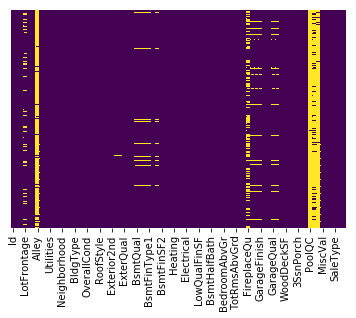

In [11]:
# to get a better idea of missing data , we can create a seaborn heatmap to see where we are missing data
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

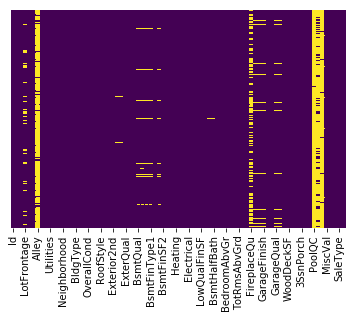

In [12]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see that missing data pattern  look similar on the variables in Training and Test data set. Let us explore this more in scrubbing the data.

# Cleaning the data


Let us merge both the training and the test data set together and start analying why the data is missing and by how much it is missing for each variable

In [13]:
combined_data =pd.concat((df_train.drop(['Id', 'SalePrice'], axis = 1),
                      df_test.drop(['Id'], axis = 1))).reset_index(drop=True)
print(df_train.shape)
print(df_test.shape)
print(combined_data.shape)


ntrain = df_train.shape[0]
ntest = df_test.shape[0]


(1460, 81)
(1459, 80)
(2919, 79)


Alright now that we have the total data set of training and test set , we shall ANalyse the missing values

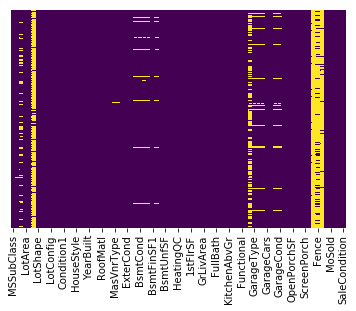

In [14]:
sns.heatmap(combined_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see that the missing data is maximum for PoolQC, Alley, MiscFeature and Fireplaces at the overview of the diagram

In [15]:
combined_data_na = (combined_data.isnull().sum() / combined_data.shape[0])*100
combined_data_na = combined_data_na.drop(combined_data_na[combined_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :combined_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

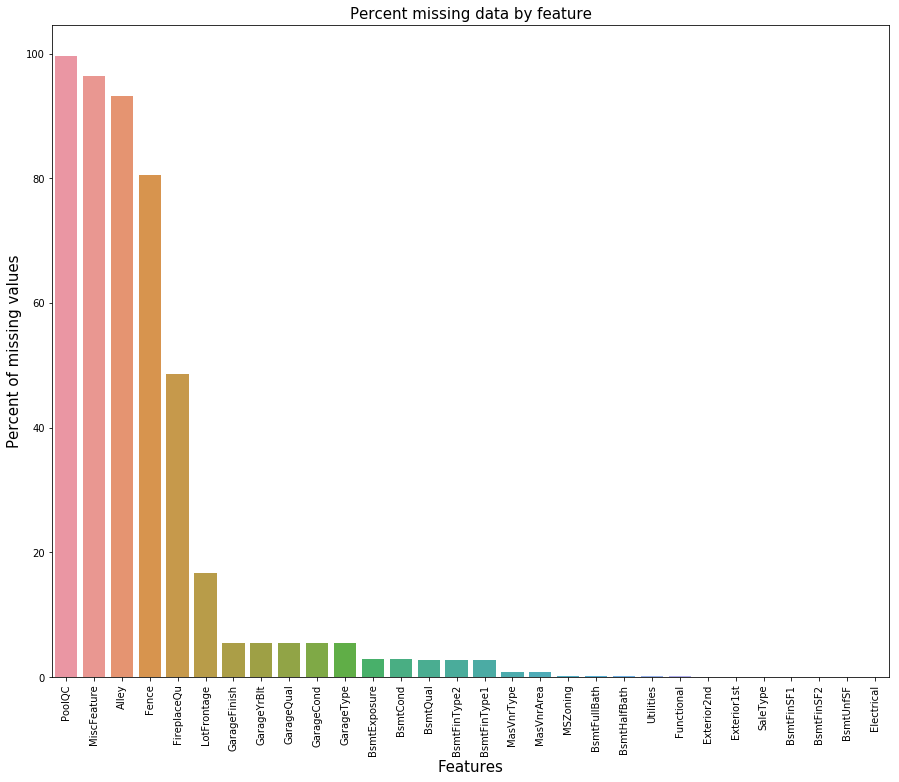

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=combined_data_na.index, y=combined_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [17]:
# All columns where missing values can be replaced with 'None'
for col in ('PoolQC', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'MasVnrType', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MSSubClass', 'MiscFeature', 'Utilities'):
    combined_data[col] = combined_data[col].fillna("None")

- PoolQC indicates the Pool Quality.So we have 4 excellent, 4 good and 2 fair. Most of the Data here is missing, which indicates as per the Data Dictionary there is no Pool.Let us recode the missing as No Pool.
- MiscFeature null indicates there are None as per the Data Dictionary.
- According to data Dictionary the Type of alley access to property can be Gravel, Paved or No alley access. Here Probably the No Alley access is beging taken as NAN and is interpreted as null value. So we can recode that as 'None'
- Fence missing indicates there is No Fence as per the data dictionary. Let it be recoded as 'None'
- the NA in FireplaceQu indicates No Fireplace as per the Data Dictionary. We can replace that will None in the data
- GarageQual, GarageCond , GarageFinish , GarageYrBlt , GarageType variables have almost the same missing percentage. As per the Data. As per the Data Dictionary, NA indicates there is No Garage and the numerical variable GarageYrBlt is null because there is No Garage for that entry.Let us recode NA as None for categorical variables and Missing value as 0 for numerica variables. GarageArea GarageCars are also 0 since there is no Garage
- BsmtQual: Evaluates the height of the basement and BsmtCond: Evaluates the general condition of the basement. If we see the missing counts in both the values are same and there is a category in the data dictionary which indicates no basement for BsmtQual. Also when there is no basement BsmtCond should also indicate there is no basement, which can be seen from the data dictionary. 
- We see that BsmtExposure BsmtFinType1 BsmtFinType2 are all dependent on the Basement, since few does not have Basement,It is highly likely that these have the same missing values as other Basement values dealt before.
- TotalBsmtSF, BsmtFullBath , BsmtUnfSF, BsmtFinSF2 , BsmtFinSF1 and BsmtHalfBath are likely to be zero for not having basement.Let us recode basement category missing as None and numerical basement variables as 0
- Masonry veneer walls is a single non-structural external masonry wall made of brick, stone or manufactured stone. It has an air space behind and is called as anchored veneer. None may indicate it is some other wall type. Since there are Missing values , it is safe to assume those are not Masonry walls but some other type. MasVnrArea indicates Masonry veneer area in square feet. So when there is None of that Type in MasVnrType , it is safe to assume the area is zero.


In [18]:
for col in ('GarageYrBlt','GarageArea','GarageCars','TotalBsmtSF','BsmtFullBath','BsmtUnfSF', 
            'BsmtHalfBath', 'BsmtFinSF2','BsmtFinSF1','MasVnrArea'):
    combined_data[col] = combined_data[col].fillna(0)

LotFrontage area is missing in many records. We can assume all the neighbourhoods to have similar LotArea and let us fill the LotArea of the missing ones by grouping them on their neighbourhood and then filling the median values of it

In [19]:
combined_data['LotFrontage'] =  combined_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [20]:
combined_data['MSZoning'].isnull().sum()

#around 4 out out are missing, we can fit this with most frequent value 

combined_data['MSZoning'].fillna(value = combined_data['MSZoning'].mode()[0] , inplace= True)

In [21]:
# there is one missing value in Electrical, we can fill that with the mode of the distribution. 
combined_data['Electrical'].fillna(value = combined_data['Electrical'].mode()[0] , inplace= True)

Exterior1st , Exterior2nd : only one value is missing in both, it is good to fill other to both which indicates it has no listed material but other covering

In [22]:
combined_data['Exterior1st'].fillna(value= 'Other', inplace= True)
combined_data['Exterior2nd'].fillna(value= 'Other', inplace= True)

In [23]:
#For Kitchen We see that there is only one value missing, let us fill with the mide.
combined_data['KitchenQual'].fillna(value = combined_data['KitchenQual'].mode()[0] , inplace= True)

In [24]:
#For Sale Type,SInce we are not sure , there is other in the data dictionary which can be filled for the missing value.
combined_data['SaleType'].fillna(value= 'Other' , inplace = True)

In [25]:
#For utilities , Only 2 values  are missing, and there is only one unique category. Let us fill the missing with the same category 
combined_data['Utilities'].fillna(value= 'AllPub', inplace= True)

We see that Typical Functionality as the most frequent value in Functional, let us fill the missing value with that

In [26]:
combined_data['Functional'].fillna(value= 'Typ' , inplace = True)

In [27]:
# Updating imputed values in train and test set
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

train_id = df_train['Id']
test_id = df_test['Id']
label = df_train['SalePrice']

df_train = combined_data[:ntrain]
df_train['SalePrice'] = label
df_train['Id'] = train_id
df_test = combined_data[ntrain:].reset_index().drop(['index'], axis = 1)
df_test['Id'] = test_id


/Users/muneermk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/muneermk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


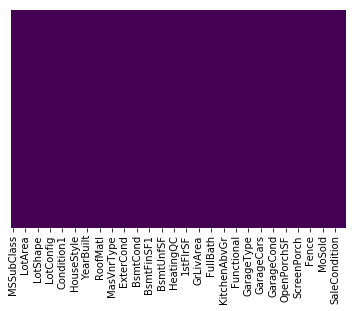

In [28]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

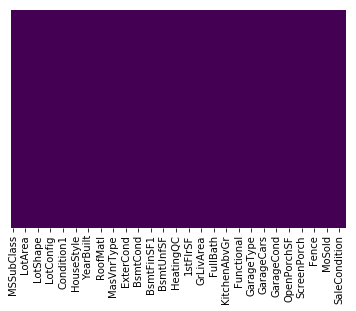

In [29]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see that the data is cleaned, we can now proceed for EDA

# EDA

So now we can proceed with Exploring our data and see if we can find some patterns out of it. It is very important to have clean data for EDA and also before modeling inorder to not introduce any sort of Bias from the data Set

In [30]:
#how many houses are there in my data set
df_train.shape

(1460, 81)

In [31]:
#let us see the columns in our data set and begin exploring
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

/Users/muneermk/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


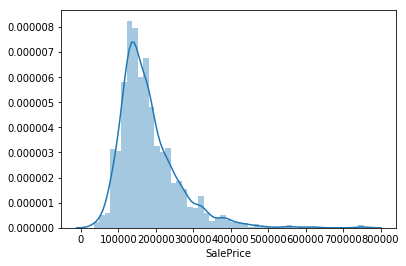

In [32]:
#histogram
sns.distplot(df_train['SalePrice'])

We see that The target Variable SalePrice is right skewed.Let us also check the normality plot


 mu = 180921.20 and sigma = 79415.29



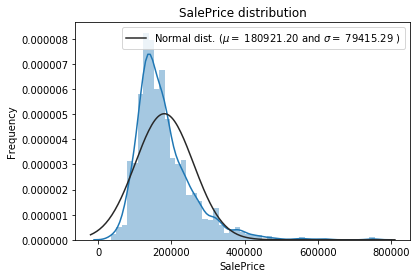

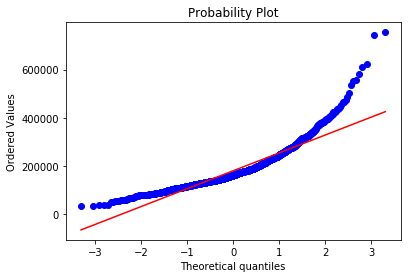

In [33]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed

/Users/muneermk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.



 mu = 12.02 and sigma = 0.40



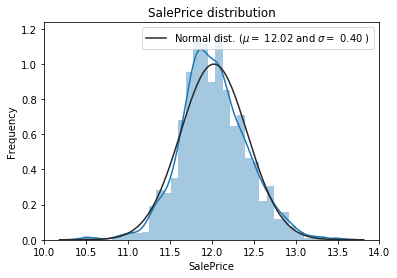

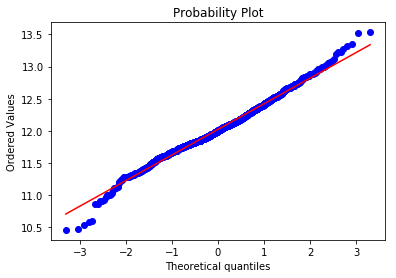

In [34]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [35]:
Y= df_train['SalePrice']
Y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

The skew seems now corrected and the data appears more normally distributed.

In [36]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Id
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.176370,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057,730.500000
std,22.433457,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449,421.610009
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271,1.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105,365.750000
50%,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512,730.500000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736,1095.250000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474,1460.000000


In [37]:
df_train.describe(include = 'object')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


# Outlier Detection

The outlier in the distribution is based on the Interquartile range of the distribution and also the Q1 and Q3 quartiles.
Ref :https://sebastianraschka.com/images/blog/2014/dixon_test/dixon_q_plot2.png

In [38]:
statistics =df_train['SalePrice'].describe()
Interquar_range = statistics['75%'] - statistics['25%']
upper_boundary = statistics['75%'] + 1.5*Interquar_range
lower_boundary = statistics['25%'] - 1.5*Interquar_range
print(upper_boundary)
print(lower_boundary)

13.02168235497344
11.027158653418315


In [39]:
#checking the lower boundary first 
df_train[df_train['SalePrice']<lower_boundary][['OverallQual','LotArea','GarageCars','MSSubClass','Neighborhood','SalePrice']]

,OverallQual,LotArea,GarageCars,MSSubClass,Neighborhood,SalePrice
30,4,8500,1.0,70,IDOTRR,10.596660
375,1,10020,0.0,30,Edwards,11.018646
410,5,9571,1.0,20,Edwards,11.002117
495,4,7879,0.0,30,IDOTRR,10.460271
533,1,5000,0.0,20,BrkSide,10.579005
636,2,6120,0.0,30,BrkSide,11.002117
705,4,5600,0.0,190,IDOTRR,10.915107
710,3,4130,0.0,30,BrkSide,10.859018
812,5,8712,2.0,20,IDOTRR,10.933000
916,2,9000,1.0,20,IDOTRR,10.471978


We observe that the Overll Quality is low, Garage Cars almost most of them are 1 or 0, And the lot Area is not too much, so its reasonable to have low price. Let us keep as it is

There are outliers in the lower range

In [40]:
#checking the upper boundary first 
df_train[df_train['SalePrice']>upper_boundary][['OverallQual','LotArea','GarageCars','MSSubClass','Neighborhood','SalePrice']]

,OverallQual,LotArea,GarageCars,MSSubClass,Neighborhood,SalePrice
178,9,17423,3.0,20,StoneBr,13.126033
185,10,22950,3.0,75,OldTown,13.071072
440,10,15431,3.0,20,NridgHt,13.226725
691,10,21535,3.0,60,NoRidge,13.534474
769,8,53504,3.0,60,StoneBr,13.195616
798,9,13518,3.0,60,NridgHt,13.091906
803,9,13891,3.0,60,NridgHt,13.275829
898,9,12919,3.0,20,NridgHt,13.323929
1046,9,16056,3.0,60,StoneBr,13.229570
1169,10,35760,3.0,60,NoRidge,13.345509


We see that the Overal Quality of the houses are good, with Good lot Area, have almost space for 3 cars and are in a good neighbourhood. SO I believe they are valid data and okay to be outliers. We shall keep them as it is.

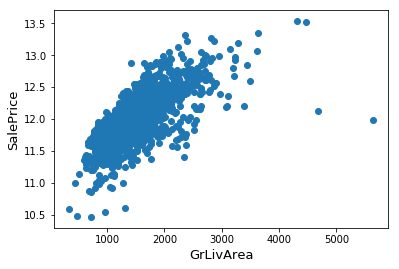

In [41]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

There is an outlier that can be seen in plot GrLivArea-SalePrice. The area of the house is greater than 4000, but the SalePrice is low.

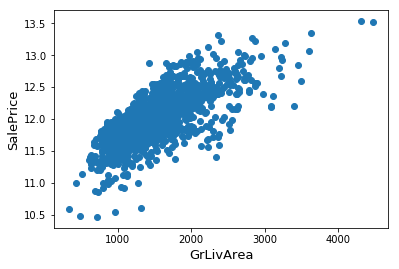

In [42]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<12.5)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [43]:
df_train.shape

(1458, 81)

In [44]:
Y = df_train['SalePrice']

In [45]:
numeric =[]
categorical = []
for columns in df_train.columns.drop(['SalePrice','Id']):
#     print (np.issubdtype(df[columns].dtype, np.number))
    if (df_train[columns].dtype in ['int64','int32','float64']):
        numeric.append(columns)
    else:
        categorical.append(columns)

In [46]:
print(numeric)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [47]:
print(categorical)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [48]:
#There are a some misclassifications . Many Categorical variables are classified as numerical and we shall remove that from numeric

mis_classiffied= ['MoSold','OverallQual','OverallCond']

In [49]:
print(numeric)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [50]:
print(categorical)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Now that we have the categorical and Numeric variables in seperate list. The main intent of this is to plot get all the numerical variable distribution and the categorical variable distribution at a single go

# Univariate Analysis

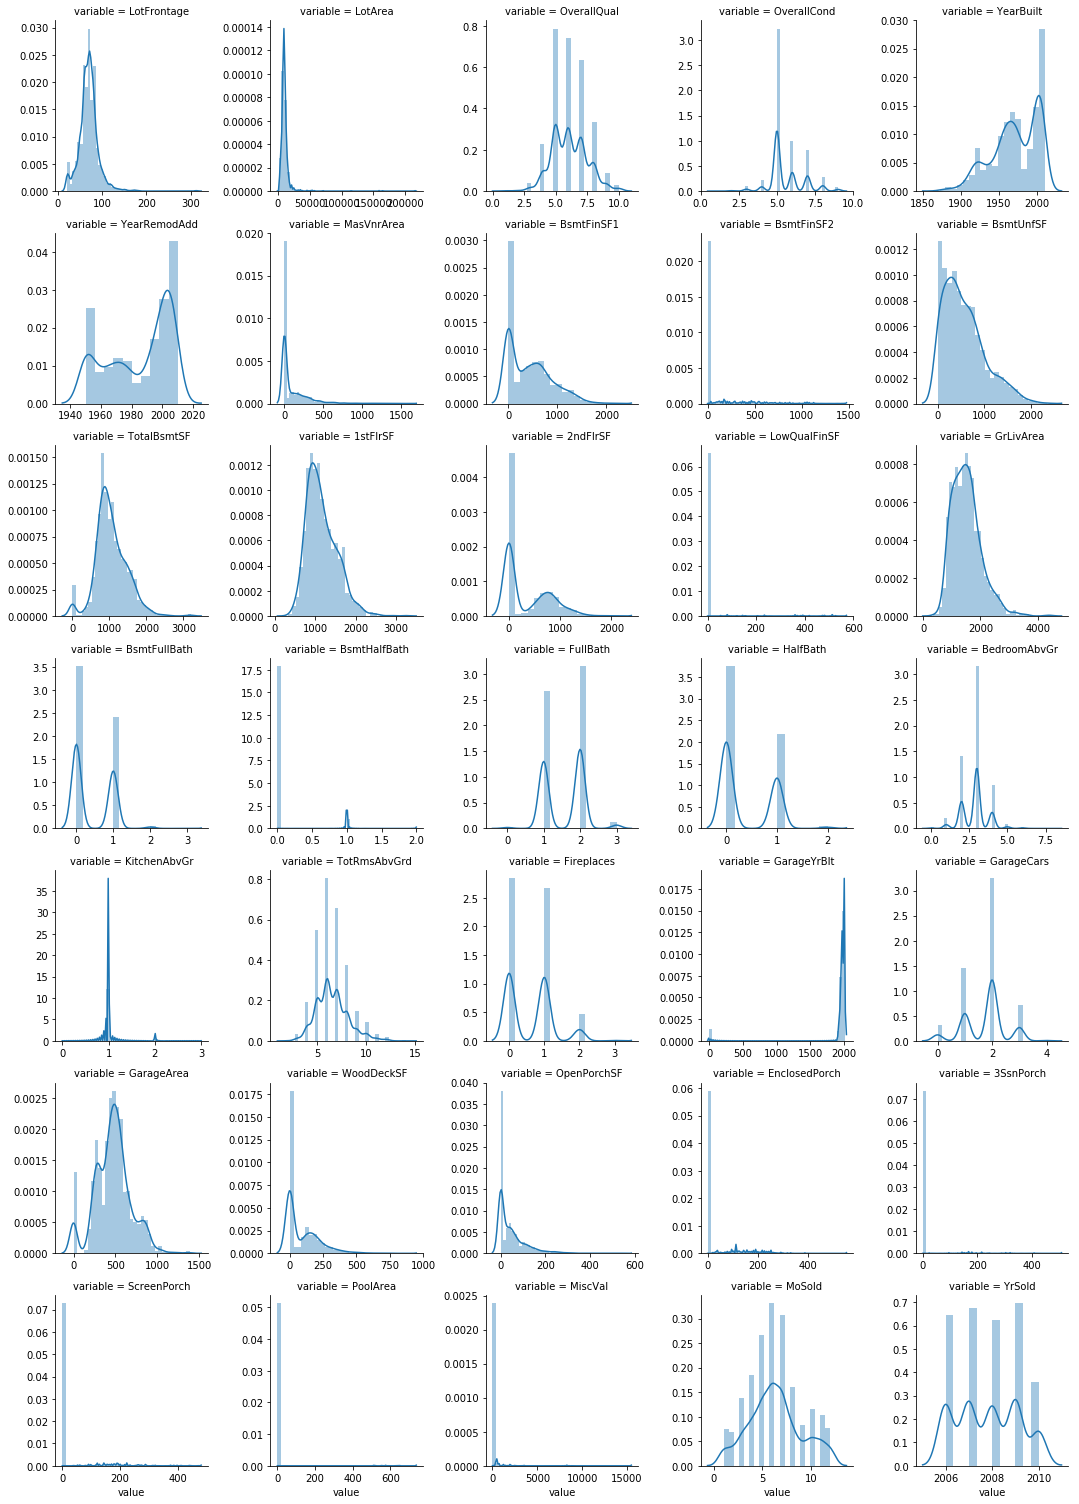

In [51]:
f = pd.melt(df_train, value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

 Observations
- Only 0.45% of houses have Pool.
- Only 1.64% of houses have 3SsnPorch.
- Only 1.78% of houses have Low Quality Finishing of floor.
- Only 2.19% of houses have Lot Area greater than 25000. The max value of Lot Area ranges above 200000. This is the reason the plot below 25000 is a bit obscure.
- Only 3.56% of houses have Miscellaneous values.
- Only 4.58% of houses have more than 1 Kitchen
- Only 8% of houses have ScreenPorch.
- Only 11.43% of houses have Type 2 finished Basement surface
- Only 14% of houses have Enclosed Porch
- 41% of houses have Masonry Veneer
- 68% of houses have Type 1 finished Basement surface

In [52]:
#Example calculation for Type 1 finished Basement Surface
(sum(f[f['variable'] =='BsmtFinSF1']['value'] > 0)/len(f[f['variable'] =='BsmtFinSF1']))*100

67.96982167352537

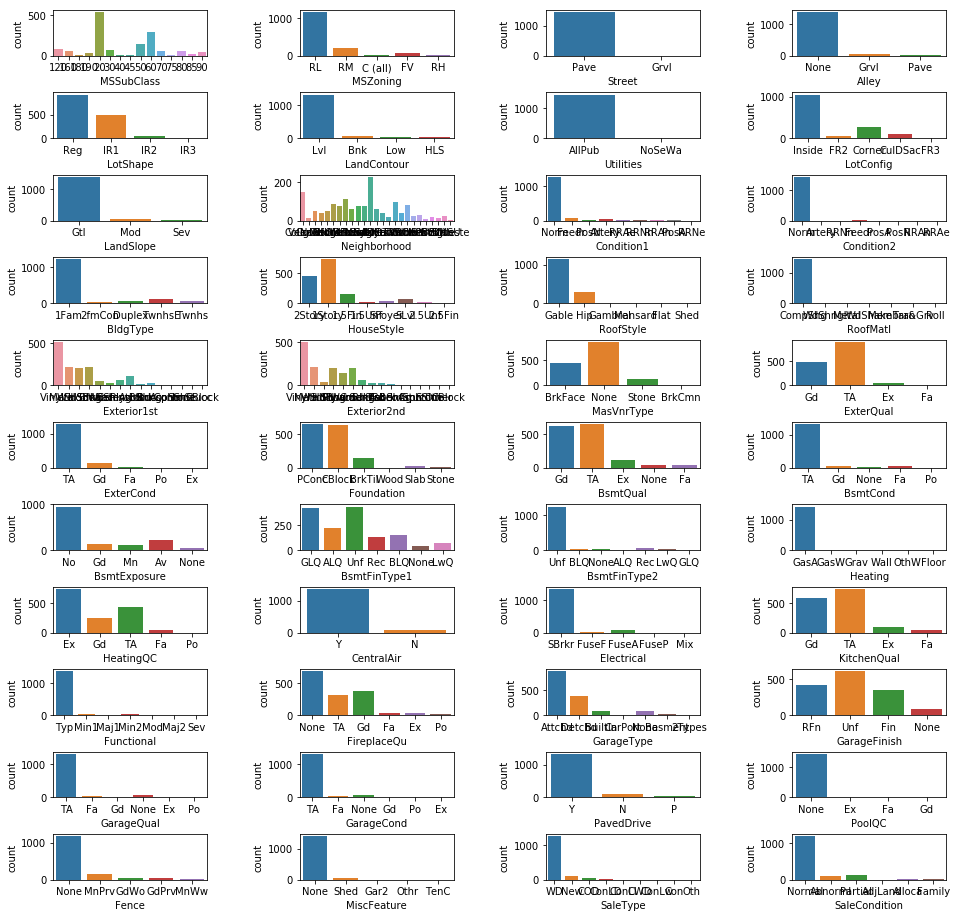

In [53]:
figures, axes = plt.subplots(nrows = math.ceil(len(categorical)/4),ncols = 4,figsize=(16, 16))
plt.subplots_adjust(hspace=0.8, wspace=0.6)
for values, axis in zip(categorical, axes.flatten()):
    sns.countplot(x=values,data=df_train,ax=axis)

We see that in many categorical Variables, the category of one type dominates the other. For example consider Street, here the Pave is almost all the rows while there are nothing for Gravel . We shall see this in detail soon.

In [54]:
df_train['Street'].value_counts()

Pave    1452
Grvl       6
Name: Street, dtype: int64

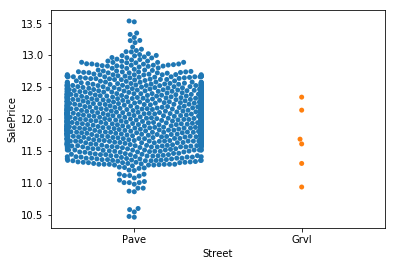

In [55]:
sns.swarmplot(y='SalePrice',
                      x='Street',
                      data=df_train)

In [56]:
df_train['Utilities'].value_counts()

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Id
LotFrontage,1.000000,0.306579,0.221879,-0.039803,0.114910,0.077720,0.167430,0.155579,0.059692,0.124175,...,0.110973,0.009744,0.067132,0.045319,0.094912,0.006851,0.020093,0.004550,0.367554,-0.013231
LotArea,0.306579,1.000000,0.091392,-0.002723,0.007462,0.007500,0.083715,0.175320,0.114297,-0.003251,...,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.260544,-0.037689
OverallQual,0.221879,0.091392,1.000000,-0.090442,0.571368,0.549827,0.398785,0.222467,-0.058324,0.308990,...,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.821405,-0.030213
OverallCond,-0.039803,-0.002723,-0.090442,1.000000,-0.375572,0.074615,-0.124261,-0.042987,0.040034,-0.136723,...,-0.029800,0.070120,0.025426,0.054632,0.002321,0.068728,-0.003735,0.043795,-0.036821,0.012925
YearBuilt,0.114910,0.007462,0.571368,-0.375572,1.000000,0.592105,0.308722,0.249818,-0.048683,0.148836,...,0.184116,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,0.587043,-0.013463
YearRemodAdd,0.077720,0.007500,0.549827,0.074615,0.592105,1.000000,0.172590,0.123039,-0.067377,0.180958,...,0.222790,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.565992,-0.022694
MasVnrArea,0.167430,0.083715,0.398785,-0.124261,0.308722,0.172590,1.000000,0.235545,-0.070533,0.113825,...,0.101698,-0.109126,0.019933,0.064258,-0.020350,-0.029346,-0.005006,-0.007215,0.430570,-0.053952
BsmtFinSF1,0.155579,0.175320,0.222467,-0.042987,0.249818,0.123039,0.235545,1.000000,-0.049622,-0.522303,...,0.072717,-0.103853,0.029177,0.068389,0.052981,0.004741,-0.004281,0.015767,0.392283,-0.015012
BsmtFinSF2,0.059692,0.114297,-0.058324,0.040034,-0.048683,-0.067377,-0.070533,-0.049622,1.000000,-0.209252,...,0.004974,0.036406,-0.030041,0.088774,0.046350,0.004905,-0.015362,0.031618,0.004863,-0.005802
BsmtUnfSF,0.124175,-0.003251,0.308990,-0.136723,0.148836,0.180958,0.113825,-0.522303,-0.209252,1.000000,...,0.128917,-0.002422,0.020806,-0.012494,-0.034936,-0.023813,0.033997,-0.040953,0.221892,-0.007499


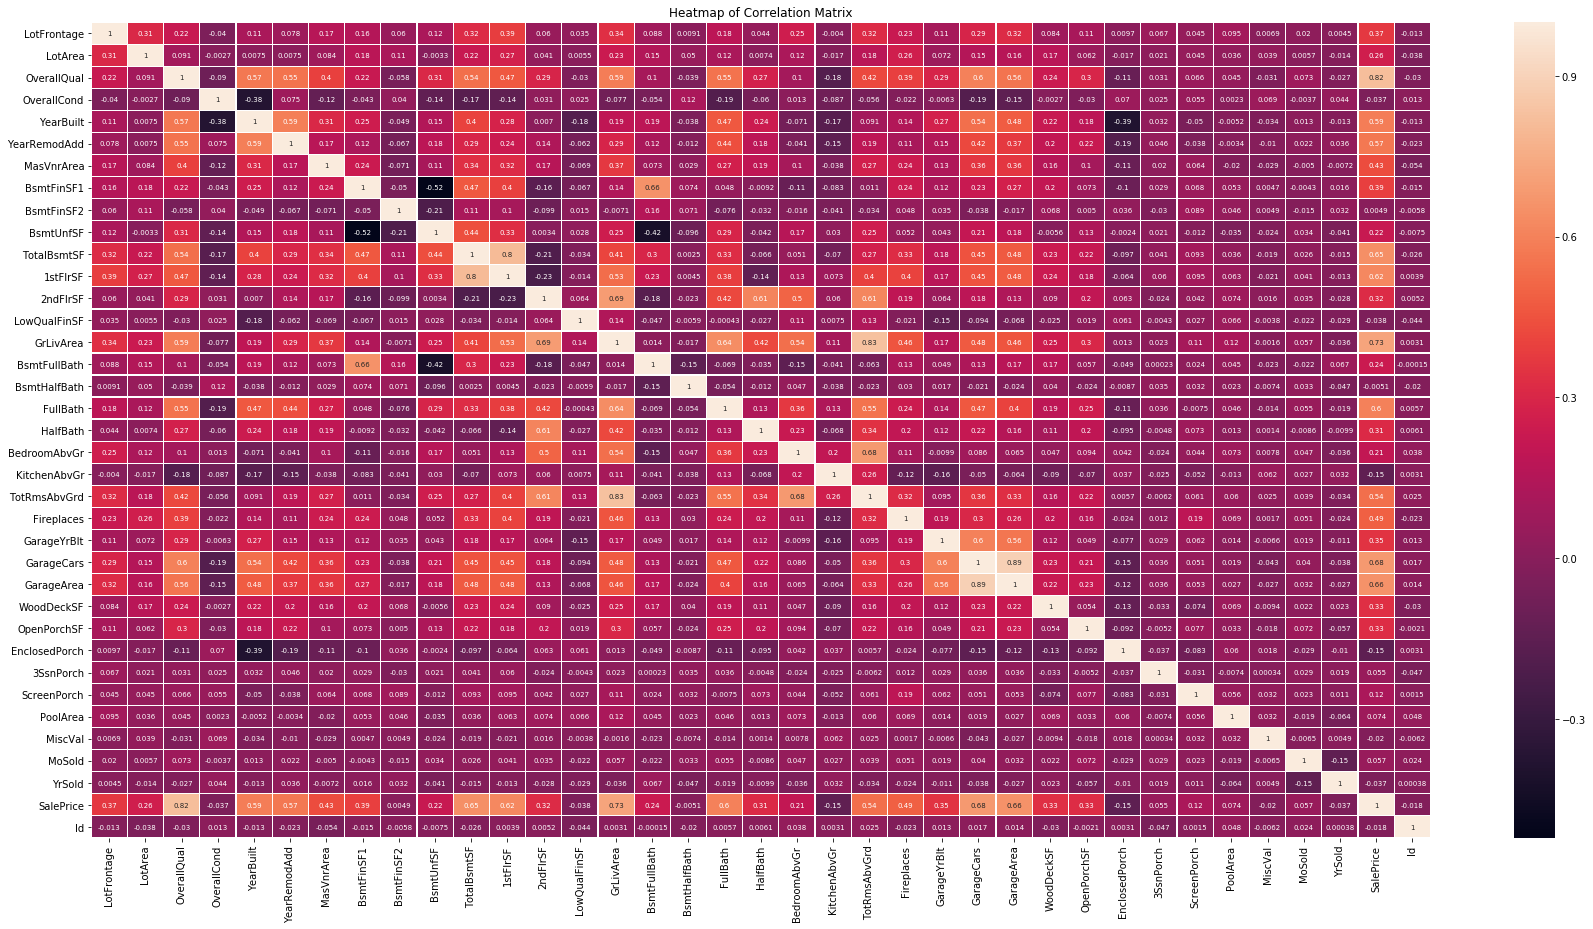

In [57]:
# Create a correlation matrix. What features correlate the most eachpther? 
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(30,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.2, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 7})
plt.title('Heatmap of Correlation Matrix')
corr

From the above graph, we can get the rough idea on what variables are highly correlated to the SalesPrice.
For example : Seeing the last row of SalesPrice with respect to heat map, we observe that OverallQual variable has high correlation with the SalesPrice.Also GrLivArea has a correlation of about 0.71
This is logical because the Variable OverallQual Rates the overall material and finish of the house, hence the high correlation with the Sales Price

In [58]:

def get_pairs(df):
    '''Grabs the combinations of pairs of column names '''
    pairs = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs.add((cols[i], cols[j]))
    return pairs

def top_abs_corrs(df, n=.5):
    '''Returns the variables with absolute value of correlation >= n'''
    corrs = df_train.corr().abs().unstack()
    pairs = get_pairs(df)
    top_corrs = corrs.drop(labels=pairs).sort_values(ascending=False)
    top_corrs = top_corrs.to_dict()
    d= {k: v for k, v in top_corrs.items() if  v >= n}
#     return top_corrs[0:n]
    return d

# return pairs from the correlation matrix with correlation >= .75
top_corrs = top_abs_corrs(corr,.75)
top_corrs

{('GarageCars', 'GarageArea'): 0.8873044983919205,
 ('GrLivArea', 'TotRmsAbvGrd'): 0.8294981976715387,
 ('OverallQual', 'SalePrice'): 0.8214046894649678,
 ('TotalBsmtSF', '1stFlrSF'): 0.8038296279256137}

# Bivariate Analysis

In [59]:

def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['SalePrice'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'Id':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['SalePrice'].mean()
        std = df.groupby(col)['SalePrice'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'SalePrice', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('house Prices')
    plt.show()

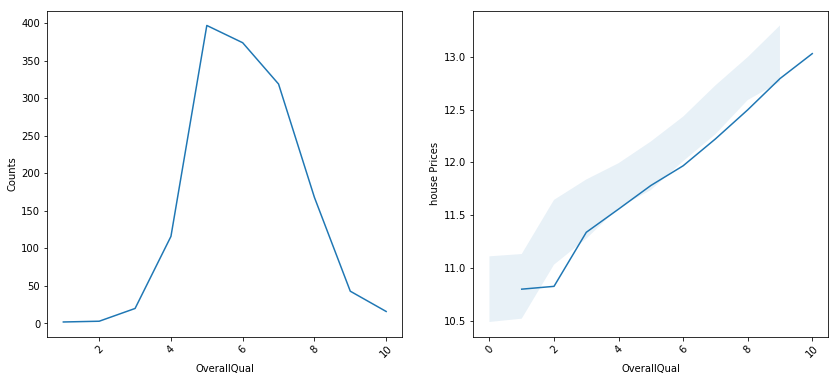

In [60]:
plot_feature(df_train, 'OverallQual')

We see that as expected the house price Increases as the Overall QUality of the house increases. The count of houses with 5-6 as the overall quality is more from the count plot

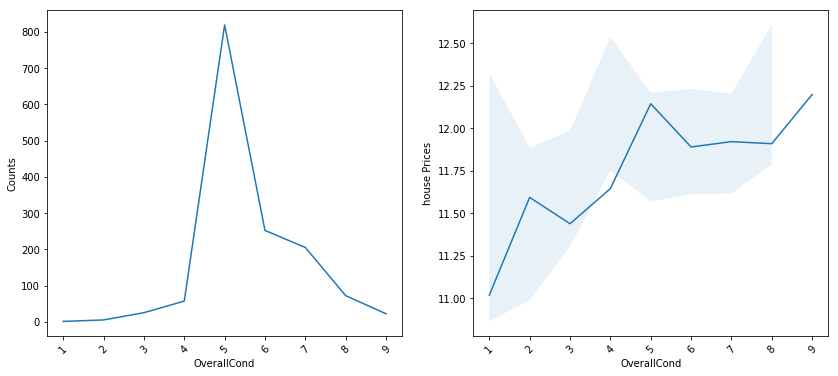

In [61]:
plot_feature(df_train, 'OverallCond')

OverallCond Rates the overall material and finish of the house. It is strange that the house with condition  level at 7 and 8 have lesser Price than say Quality of 5.  Here also The count of houses with 5 as the overall condition is more from the count plot

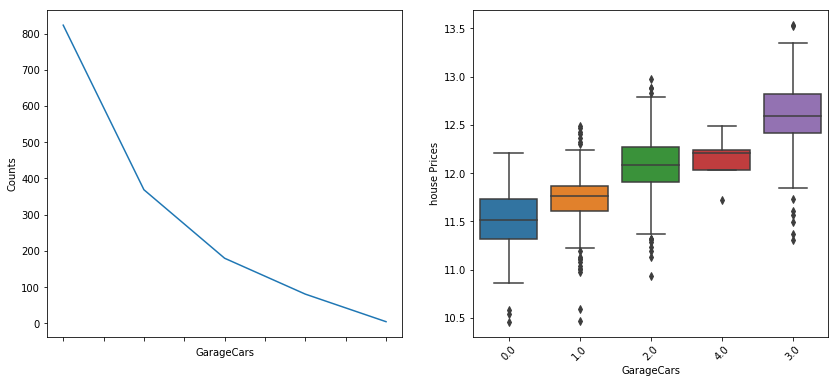

In [62]:
plot_feature(df_train, 'GarageCars')

/Users/muneermk/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


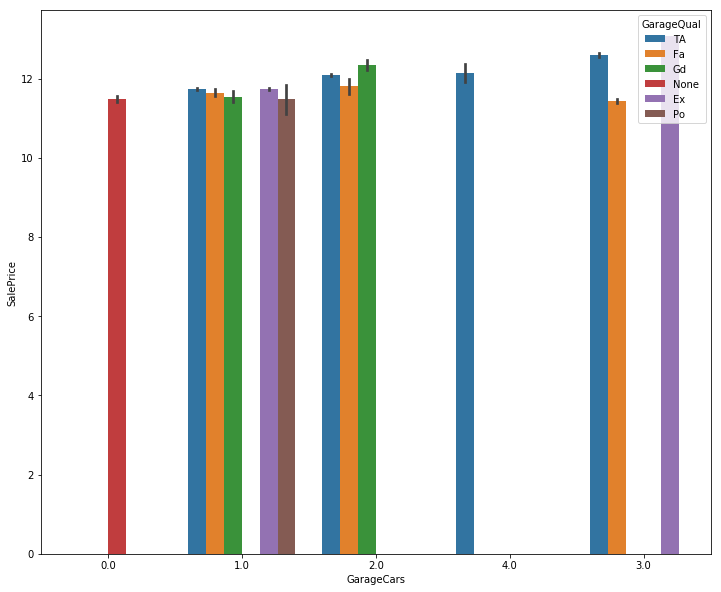

In [63]:
plt.figure(figsize=(12,10))
sns.barplot('GarageCars','SalePrice',data=df_train, hue= 'GarageQual')

We see that the houses with 3 car space has high demand and if the quality is fair and above, it contributes well to the sale price of the house.

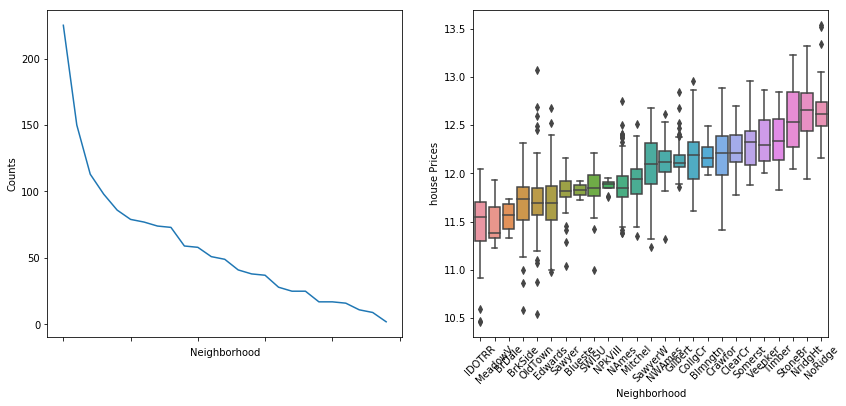

In [64]:
plot_feature(df_train, 'Neighborhood')

From the above we observe that the houses with neighbourhoods to Northridge,Northridge Heights and Stone Brook fetch higher prices compared to other neighbourhoods

Let us see how Bathrooms affect the Sale price of the house
We see that BsmtFullBath,BsmtHalfBath,FullBath,HalfBath which talk about the number of bath rooms.
Let us combine all of these to get the total number of bath rooms in a house and see how that compares with the sale price of a house

In [65]:
df_train['SalePrice'].corr(df_train['BsmtFullBath'] + df_train['BsmtHalfBath']+ df_train['FullBath'] + df_train['HalfBath'])

0.6610483414992474

Let us add these and create a new variable total bath that has the total number of baths in the house.

In [66]:
df_train['Total_bath'] = df_train['BsmtFullBath'] + df_train['BsmtHalfBath']+ df_train['FullBath'] + df_train['HalfBath']
df_test['Total_bath'] = df_test['BsmtFullBath'] + df_test['BsmtHalfBath']+ df_test['FullBath'] + df_test['HalfBath']

In [67]:
#Let us drop these variables from the train and test to avoid redundancy
df_train.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1, inplace= True)
df_test.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1, inplace= True)

In [68]:
#LEt us check the new shape of our data set...we have dropped 4 variables and added one
print(df_train.shape)
print(df_test.shape)

(1458, 78)
(1459, 77)


In [69]:
df_train['Total_bath'].value_counts()

2.0    572
3.0    477
1.0    228
4.0    172
5.0      6
6.0      3
Name: Total_bath, dtype: int64

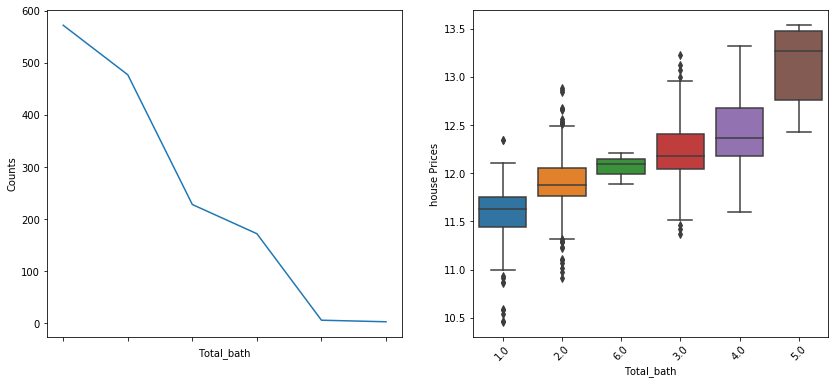

In [70]:
# sns.barplot(x= 'Total_bath' , y = 'SalePrice', data = df_train)
plot_feature(df_train, 'Total_bath')

WE see that as the number of Baths increases the house price increases drastically and also the mean value for a house with more bathrooms is very high

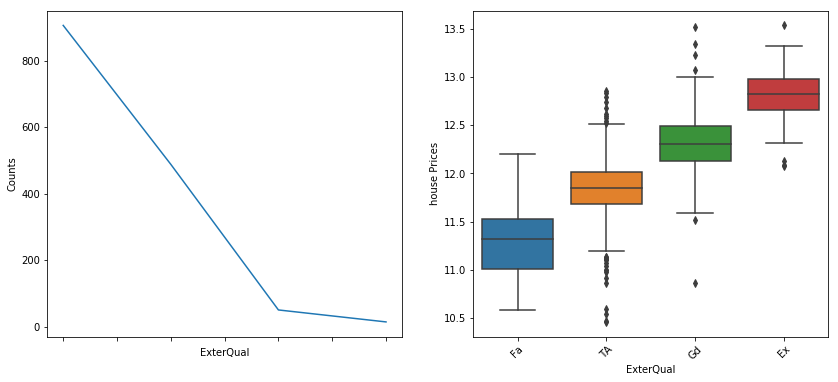

In [71]:
plot_feature(df_train, 'ExterQual')

As a potential buyer, one would definitely look at the exterior quality of a house. As the Exterior quality increases, the sale price increases

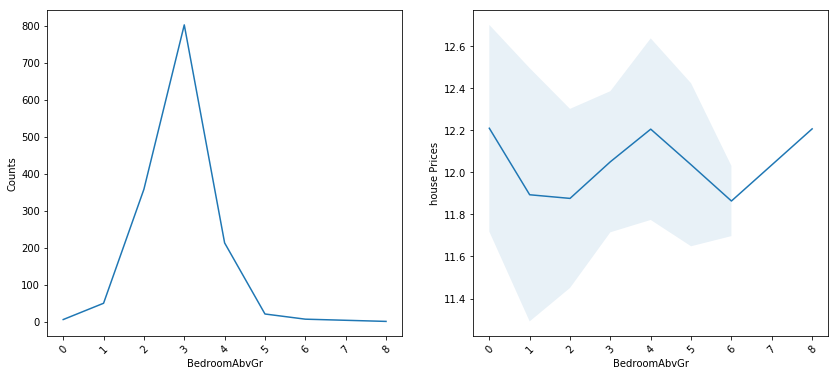

In [72]:
plot_feature(df_train, 'BedroomAbvGr')

We see that there is a high demand for houses with 0,4 and 8 bedrooms. It is strange to see houses with zero bedrooms getting high price. Let us examine this further

In [73]:
df_train[df_train['BedroomAbvGr']==0][['BedroomAbvGr','2ndFlrSF','GrLivArea','SalePrice']]

,BedroomAbvGr,2ndFlrSF,GrLivArea,SalePrice
53,0,0,1842,12.861001
189,0,0,1593,12.563751
634,0,0,1056,11.877576
1163,0,0,1258,11.598736
1213,0,0,960,11.884496
1270,0,192,1524,12.468441


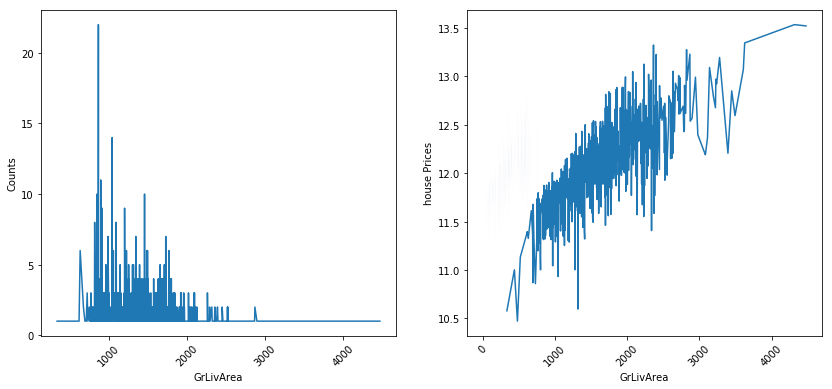

In [74]:
plot_feature(df_train, 'GrLivArea')

We see that GrLivArea , they can expect to get   good sale pricehas high correlation with the House Prices. SO whenver the houses do not have bedrooms and they have good GrLivArea , they can expect to get good sale price

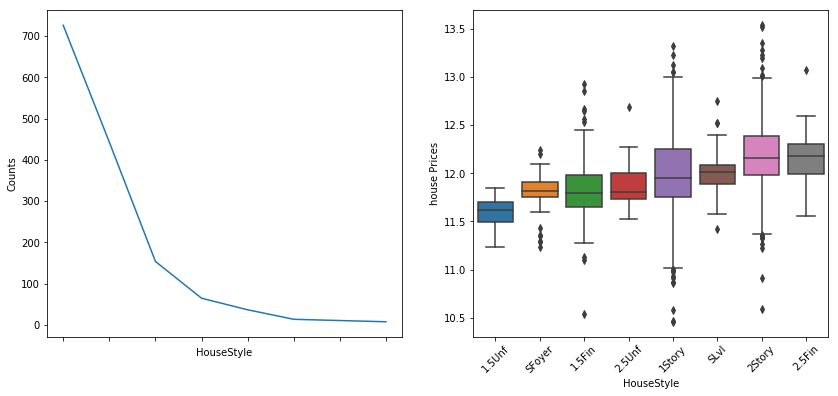

In [75]:
#LEt us see what effect does Style of dwelling has on the house prices
plot_feature(df_train, 'HouseStyle')


/Users/muneermk/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

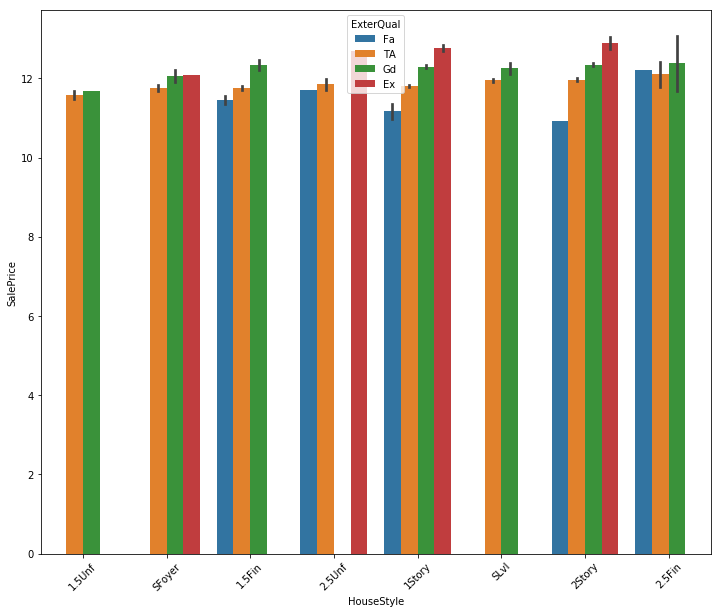

In [76]:
plt.figure(figsize=(12,10))
sns.barplot('HouseStyle','SalePrice',data=df_train, hue= 'ExterQual')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

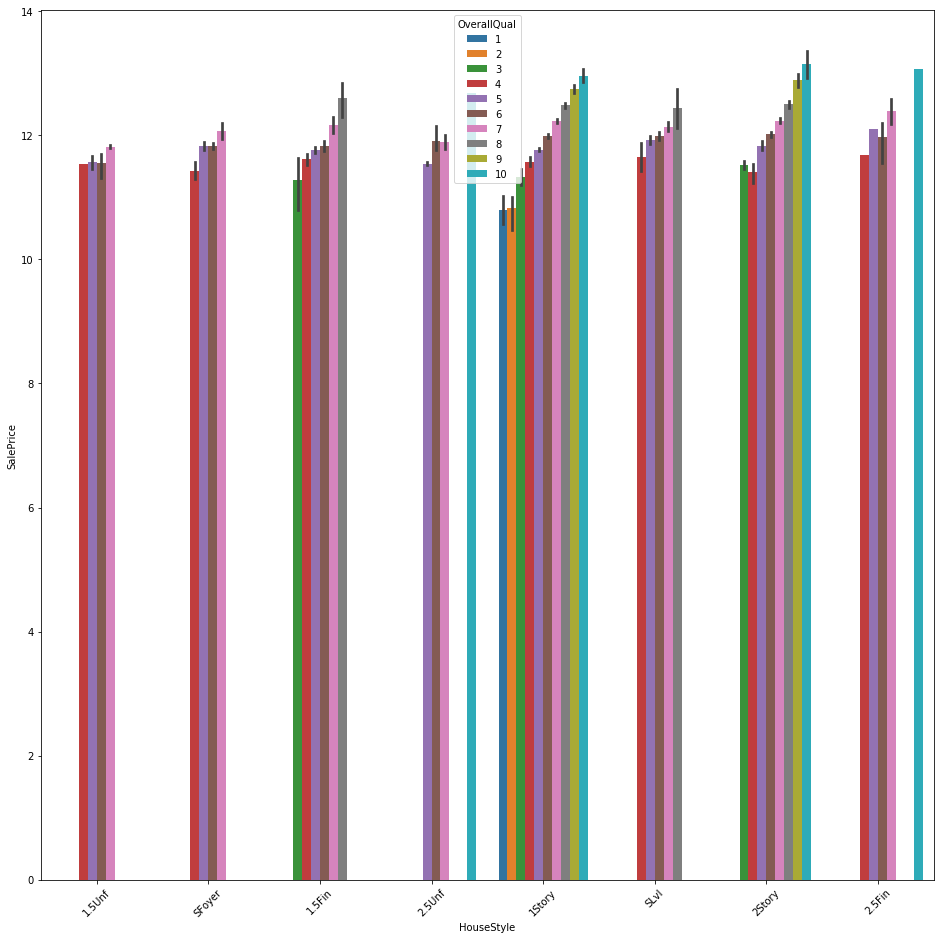

In [77]:
plt.figure(figsize=(16,16))
sns.barplot('HouseStyle','SalePrice',data=df_train, hue= 'OverallQual')
plt.xticks(rotation=45)

COmbining the above 2 plots , we can conculde that the 2 story and 1 story buildings with excellent exterior condition and excellent overquality fethes the maximum price

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64


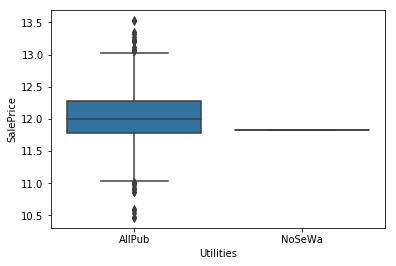

In [78]:
print(df_train['Utilities'].value_counts())
sns.boxplot('Utilities','SalePrice',data=df_train)

Unfortunately there is only one house in the NoSeWa	Electricity and Gas Only, but the sale price of it is not bad. SO the utilities has no tremendous effect on the house price

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

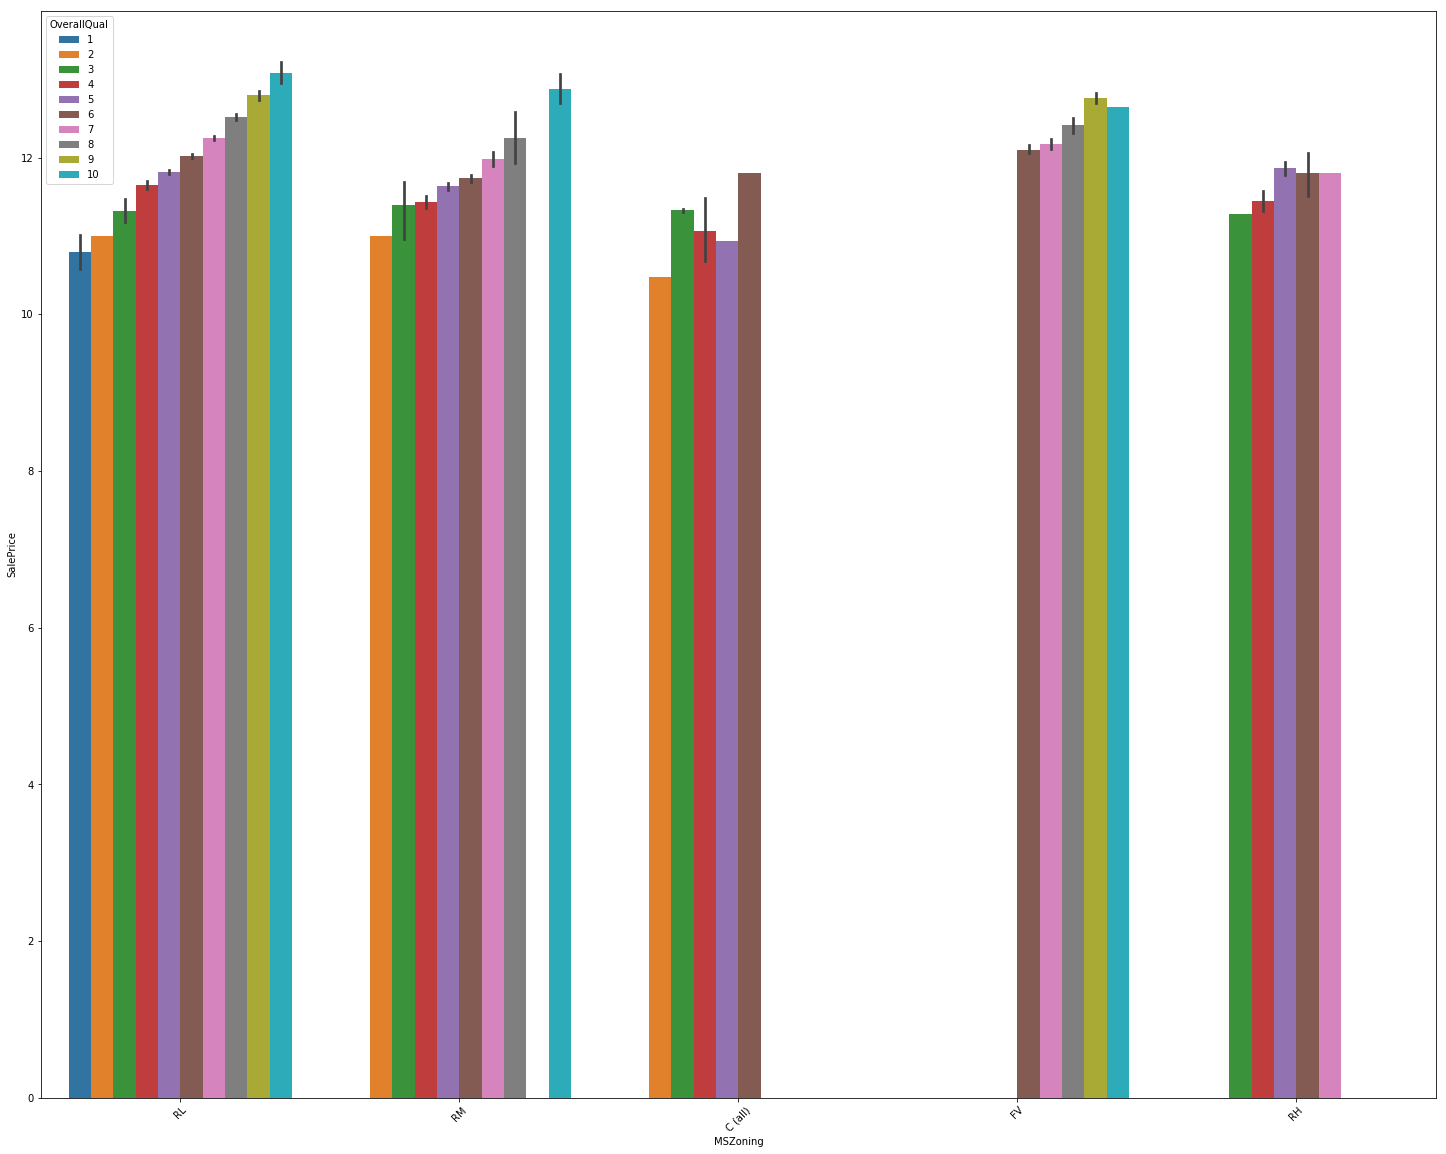

In [79]:
plt.figure(figsize=(25,20))
sns.barplot('MSZoning','SalePrice',data=df_train, hue= 'OverallQual')
plt.xticks(rotation=45)

We see that house with Residential Low Density and Floating Village Residential have high demand and the price increases as the house quality increases. ALso demand can be seen for Residential Medium Density houses with excellent quality

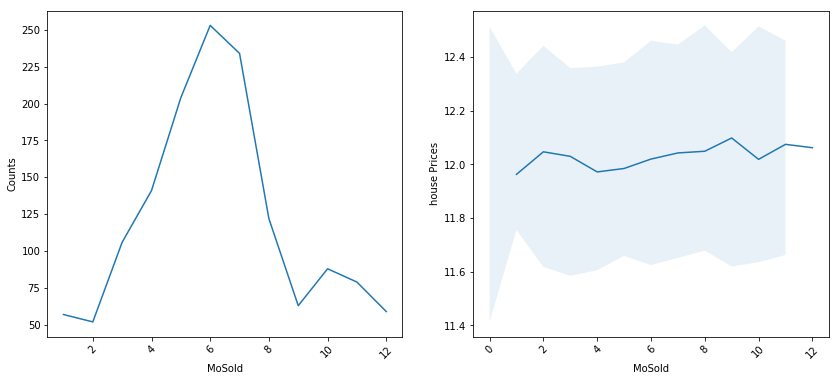

In [80]:
#Let us see which month had the best sale..
plot_feature(df_train, 'MoSold')

In [81]:
print(df_train["MoSold"].value_counts())

6     253
7     234
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      57
2      52
Name: MoSold, dtype: int64


We see that maximum houses are sold betwen May-July, but that doesnt have any Drastic effect on Sale Price

Let us see how the age of the house matters for the Sale Price

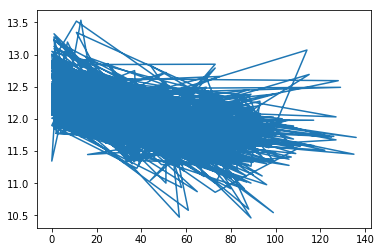

In [82]:
house_age = df_train['YrSold'] - df_train['YearBuilt']
plt.plot(house_age, df_train['SalePrice'])

# plot_feature(df_train,('YrSold'- 'YearBuilt'))

As Expected the house Price decreases with the house getting older except for some outliers

Let us see if the Moded house or the house which is untouched fetches high value

In [83]:
df_train[['YearBuilt','YearRemodAdd' ]].iloc[522]

YearBuilt       1947
YearRemodAdd    1950
Name: 522, dtype: int64

In [84]:
mod = []
for i in range(len(df_train)):
    
    if df_train['YearBuilt'].iloc[i] == df_train['YearRemodAdd'].iloc[i]:
        mod.append(0)
    else:
        mod.append(1)
        
df_train['mod'] = mod

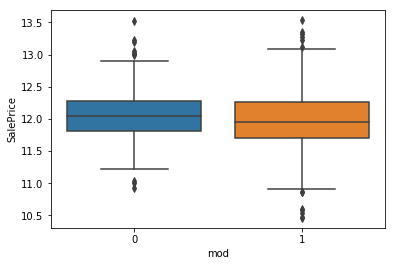

In [85]:
sns.boxplot('mod','SalePrice',data = df_train)

There is no significant difference between not modded and modded house

In [86]:
#let us drop the mod column
df_train.drop('mod',axis=1,inplace= True)

Let us see if there is any correlation between the square feet variables mentioned

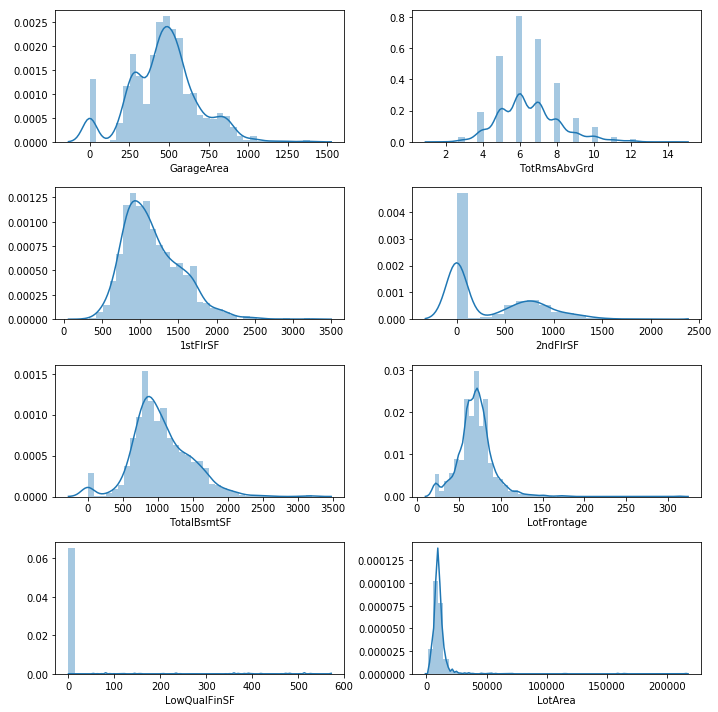

In [87]:
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(10,10))
plt.subplot(4,2,1)
sns.distplot(df_train['GarageArea'])
plt.subplot(4,2,2)
sns.distplot(df_train['TotRmsAbvGrd'])
plt.subplot(4,2,3)
sns.distplot(df_train['1stFlrSF'])
plt.subplot(4,2,4)
sns.distplot(df_train['2ndFlrSF'])
plt.subplot(4,2,5)
sns.distplot(df_train['TotalBsmtSF'])
plt.subplot(4,2,6)
sns.distplot(df_train['LotFrontage'])
plt.subplot(4,2,7)
sns.distplot(df_train['LowQualFinSF'])
plt.subplot(4,2,8)
sns.distplot(df_train['LotArea'])

plt.tight_layout()

From the above figure We guess that GarageArea seemed to be just the total of square feet 1st and 2nd floor

In [88]:
df_train['GrLivArea'].corr(df_train['1stFlrSF']+ df_train['2ndFlrSF'])

0.9954098084600849

Woah that is very close correlation, Let us see its Data in the table..and let us display all the data plotted above


In [89]:
df_train[['GrLivArea','1stFlrSF','2ndFlrSF','TotRmsAbvGrd','TotalBsmtSF','LotFrontage','LowQualFinSF','LotArea']].tail(10)

,GrLivArea,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,TotalBsmtSF,LotFrontage,LowQualFinSF,LotArea
1450,1792,896,896,8,896.0,60.0,0,9000
1451,1578,1578,0,7,1573.0,78.0,0,9262
1452,1072,1072,0,5,547.0,35.0,0,3675
1453,1140,1140,0,6,1140.0,90.0,0,17217
1454,1221,1221,0,6,1221.0,62.0,0,7500
1455,1647,953,694,7,953.0,62.0,0,7917
1456,2073,2073,0,7,1542.0,85.0,0,13175
1457,2340,1188,1152,9,1152.0,66.0,0,9042
1458,1078,1078,0,5,1078.0,68.0,0,9717
1459,1256,1256,0,6,1256.0,75.0,0,9937


LowQualFinSF seems to be zero, let us see how it corelates to the GrLivArea

In [90]:
df_train['GrLivArea'].corr(df_train['1stFlrSF']+ df_train['2ndFlrSF']+df_train['LowQualFinSF'])

1.0

So Low quality finished square feet (all floors) is also adding to GrLivArea. So we have redundant data and can drop remaining ones

Basement Variables : Let us see if we can find some correlation between them

In [91]:
df_train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].head(10)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706.0,0.0,150.0,856.0
1,978.0,0.0,284.0,1262.0
2,486.0,0.0,434.0,920.0
3,216.0,0.0,540.0,756.0
4,655.0,0.0,490.0,1145.0
5,732.0,0.0,64.0,796.0
6,1369.0,0.0,317.0,1686.0
7,859.0,32.0,216.0,1107.0
8,0.0,0.0,952.0,952.0
9,851.0,0.0,140.0,991.0


We see that sum of BsmtFinSF1,BsmtFinSF2 and BsmtUnfSF is equal to TotalBsmtSF,let us see the correlation

In [92]:
df_train['TotalBsmtSF'].corr(df_train['BsmtFinSF1']+ df_train['BsmtFinSF2'] + df_train['BsmtUnfSF'])

1.0

We see that the correlation is 1. It makes sense. The buyer wants to know the Total square feet of basement area and will hardly look at individual features like Type 1 finished square feet, Type 2 finished square feet and Unfinished square feet of basement area

This is redundant data

Let us drop the redundant data from our data frame

In [93]:
df_train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [94]:
#Let us verify the new size of the data frame
df_train.shape

(1458, 72)

In [95]:
#Let us drop these variables on our Test data too
df_test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
df_test.shape

(1459, 71)

We saw the following high correlation between the variables:
('GarageCars', 'GarageArea'): 0.8824754142814603,
('GrLivArea', 'TotRmsAbvGrd'): 0.8254893743088377,

This is a redundant data, So I will Drop 'GarageArea' and keep GarageCars because thinking logically the buyer wants to know how many cars fit in and not its area

between 'GrLivArea' 'TotRmsAbvGrd', I would like to know as a buyer Above grade (ground) living area square feet over Total rooms above grades qft, so I will drop TotRmsAbvGrd 

In [96]:
#Droping the columns in both training and test data
df_train.drop(['GarageArea','TotRmsAbvGrd'],axis=1,inplace=True)
df_test.drop(['GarageArea','TotRmsAbvGrd'],axis=1,inplace=True)

In [97]:
print(df_train.shape)
print(df_test.shape)

(1458, 70)
(1459, 69)


# Preprocessing

The categorical variables in its original form is not understood by the many Models. It is good to convert them to the system understandable form.
We cnvert the ordinal categorical variables using label encoding and Nominal variales using one hot encoding. We do this in a different way because we want the model to identify the ordinal and Nominal variables, because the order matters in ordinal variables and not in Nominal Variables

Let us first differentiate the nominal and ordinal variables in our data set manually.

In [98]:
df_train.info()
copy_combined =combined_data.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 70 columns):
MSSubClass       1458 non-null object
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null category
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null category
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      14

In [99]:
#There are few misclassified variables let us correct them
df_train['OverallQual'] = df_train['OverallQual'].astype(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 70 columns):
MSSubClass       1458 non-null object
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null category
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null category
OverallQual      1458 non-null object
OverallCond      1458 non-null object
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      

In [101]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 69 columns):
MSSubClass       1459 non-null object
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 n

In [102]:
#The same variables are misclassified in test data set too,let us change the type
df_test['OverallQual'] = df_test['OverallQual'].astype(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)


In [103]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 69 columns):
MSSubClass       1459 non-null object
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null object
OverallCond      1459 non-null object
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459

In [104]:
#Since we have dropped multiple columns, let us get the numerical and categorical variables again
numeric =[]
categorical = []
for columns in df_train.columns.drop(['SalePrice','Id']):
#     print (np.issubdtype(df[columns].dtype, np.number))
    if (df_train[columns].dtype in ['int64','int32','float64']):
        numeric.append(columns)
    else:
        categorical.append(columns)

In [105]:
print(numeric)
print(categorical)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition', 'Total_bath']


# Encoding the categorical to numerical forms

- LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

- One-Hot-Encoding has a the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality

In [106]:
#Let us combine the data sets again since we have done a lot of changes from the first time we created it.
combined_data =pd.concat((df_train.drop(['Id', 'SalePrice'], axis = 1),
                      df_test.drop(['Id'], axis = 1))).reset_index(drop=True)
print(df_train.shape)
print(df_test.shape)
print(combined_data.shape)

(1458, 70)
(1459, 69)
(2917, 68)


In [107]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 68 columns):
MSSubClass       2917 non-null object
MSZoning         2917 non-null object
LotFrontage      2917 non-null float64
LotArea          2917 non-null int64
Street           2917 non-null object
Alley            2917 non-null object
LotShape         2917 non-null object
LandContour      2917 non-null object
Utilities        2917 non-null object
LotConfig        2917 non-null object
LandSlope        2917 non-null object
Neighborhood     2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
BldgType         2917 non-null object
HouseStyle       2917 non-null object
OverallQual      2917 non-null object
OverallCond      2917 non-null object
YearBuilt        2917 non-null int64
YearRemodAdd     2917 non-null int64
RoofStyle        2917 non-null object
RoofMatl         2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917

In [108]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond','MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(combined_data[c].values)) 
    combined_data[c] = lbl.transform(list(combined_data[c].values))

# shape        
print('Shape all_data: {}'.format(combined_data.shape))

Shape all_data: (2917, 68)


In [109]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [110]:
# Check the skew of all numerical features
skewed_feats = combined_data[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
3SsnPorch,11.372080
KitchenAbvGr,4.300550
EnclosedPorch,4.002344
ScreenPorch,3.945101
MasVnrArea,2.621719
OpenPorchSF,2.529358
WoodDeckSF,1.844792


In [111]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    combined_data[feat] = boxcox1p(combined_data[feat], lam)

There are 19 skewed numerical features to Box Cox transform


In [112]:
#Getting the dummies or converting the other categorical featues into binary form
all_data = pd.get_dummies(combined_data)

In [113]:
all_data.shape

(2917, 222)

In [114]:
df_train = all_data[ : len(df_train)]
df_test = all_data[ len(df_train) : ]

# Modeling

In [116]:

# import libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

Let us first split the training data into Train and test, and chech which model performs the best on this Test data. Then the best model is chosen to fit the Original Test Data

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X= df_train

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Evaluation Metric

Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

In [120]:

#Validation function
n_folds = 5

def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#  Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg= LinearRegression()
reg.fit(X,Y)
reg.score(X,Y)


0.942225404476237

# Polynomial Regression

In [122]:

# 2nd degree order
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
reg_poly= LinearRegression()
reg_poly.fit(X_poly,Y)
reg_poly.score(X_poly, Y)


1.0

# Ridge Regression

In [123]:
# Hyperparameter Tuning
alphas = [0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]
ridge_reg = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_reg.fit(X, Y)

cv_mse = np.mean(ridge_reg.cv_values_, axis=0)
print("alphas: %s" % alphas)
print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % ridge_reg.alpha_)

alphas: [0.1, 1, 10, 100, 1000.0, 10000.0, 20000.0, 50000.0, 80000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0]
CV MSE: [0.01453005 0.01373782 0.01353325 0.01592383 0.02446664 0.05210182
 0.06769137 0.09478453 0.10958139 0.11621903 0.15362204 0.15922637
 0.15981435]
Best alpha using built-in RidgeCV: 10.000000


In [124]:
# continued Hyperparameter tuning
alphas = [1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11]
ridge_reg = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_reg.fit(X, Y)

cv_mse = np.mean(ridge_reg.cv_values_, axis=0)
print("alphas: %s" % alphas)
print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % ridge_reg.alpha_)

alphas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
CV MSE: [0.01373782 0.01349846 0.01340566 0.01337388 0.0133735  0.01339095
 0.01341904 0.01345365 0.01349225 0.01353325 0.01357561]
Best alpha using built-in RidgeCV: 5.000000


In [125]:

ridge_reg = make_pipeline(StandardScaler(), Ridge(alpha = 8))
ridge_reg.fit(X, Y)

# score
ridge_reg.score(X, Y)

/Users/muneermk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/muneermk/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/muneermk/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9421414580845318

# Lasso Regression

In [126]:
lasso = Lasso(alpha = 0.0005)
lasso.fit(X, Y)

# score
lasso.score(X, Y)

0.9310983711759528

# Elastic Net Regression

In [127]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X, Y)

# score
ENet.score(X, Y)

0.9347767026903788

# DecisionTreeRegressor.
This is a powerful model, capable of finding complex nonlinear
relationships in the data

In [128]:

# Hyperparameter tuning
depth = [3,4,5,6]

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dict(max_depth=depth), 
                           cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

print(grid_search.best_params_, grid_search.best_score_)

{'max_depth': 5} -0.03878238637971771


In [129]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X, Y)

# score
tree_reg.score(X, Y)

0.8326242126866441

# Random Forest

In [130]:
# Hyperparameter Tuning
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 200, 400], 'max_features': [12, 14, 16]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, Y)

print(grid_search.best_params_, grid_search.best_score_)

{'max_features': 16, 'n_estimators': 400} -0.02093471439220792


In [131]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=16, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [132]:
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=16, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

forest_reg.fit(X, Y)

# score
forest_reg.score(X, Y)

0.982611715282266

That is a good score

# Gradient Boosting Regression

In [133]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(X, Y)

# score
GBoost.score(X, Y)

0.9837641523014986

# XGBoost

In [134]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X, Y)
model_xgb.score(X, Y)

0.9581062771270634

In [135]:

from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X, Y)
KRR.score(X, Y)

0.9559072827008075

# RMSLE Scores


In [136]:
# Linear Regression
score = rmsle_cv(reg, X,Y)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 186486492.8050 (372972985.3739)



In [137]:
#Polynomial Regression
score = rmsle_cv(reg_poly,X,Y)
print("\nPolynomial Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Polynomial Regression score: 186486492.8050 (372972985.3739)



In [138]:
# Gradient Boosting
score = rmsle_cv(GBoost, X,Y)
print("\n Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Gradient Boosting score: 0.1177 (0.0072)



In [139]:
# Random Forest
score = rmsle_cv(forest_reg, X,Y)
print(" Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Random Forest score: 0.1444 (0.0088)



In [140]:
# Decision Tree
score = rmsle_cv(tree_reg, X,Y)
print("\n Decision Tree score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Decision Tree score: 0.2034 (0.0075)



In [146]:
#Ridge Regression
score = rmsle_cv(ridge_reg, X,Y)
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression score: 0.1210 (0.0104)



/Users/muneermk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/muneermk/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/muneermk/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/muneermk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/muneermk/anaconda3/lib/python3.6/site-packages/skle

In [142]:
#Lasso Regression
score = rmsle_cv(lasso, X,Y)
print("\nLasso Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso Regression score: 0.1150 (0.0082)



In [143]:
#Elastic Net Regression
score = rmsle_cv(ENet, X,Y)
print("\nElastic Net Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net Regression score: 0.1124 (0.0081)



In [144]:
#XGBoost 
score = rmsle_cv(model_xgb, X,Y)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost score: 0.1188 (0.0060)



In [154]:
#Prediction using XGBoost
xgb_pred = model_xgb.predict(df_test)
xgb_pred= np.expm1(xgb_pred)

# Feature Importance

In [157]:
# Get Feature Importances
feature_importances = pd.DataFrame(forest_reg.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
top_features = feature_importances.head(10)
print(feature_importances.head(10))

          index  importance
0     GrLivArea    0.101638
1   TotalBsmtSF    0.059083
2     YearBuilt    0.053246
3   GarageYrBlt    0.052718
4    GarageCars    0.049260
5    Total_bath    0.047483
6     ExterQual    0.046855
7   KitchenQual    0.037362
8    Fireplaces    0.035489
9  YearRemodAdd    0.032461


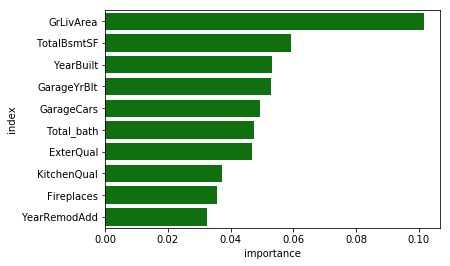

In [158]:
# Plot the Feature Importance
sns.barplot(x='importance', y='index', data=top_features, label='Total', color='g')

# Conclusion

- After a lot of Analysis We are in a position to predict how much a house would cost given a lot of features associated with it. 
- I started the process with Data Cleaning, Data Preprocessing and Outlier detection. After that we did feature engineering and removed the redundant features.
- Once the data was ready we started fitting the data and based on our evaluation we predicted the house prices on the test data.
- We also got to know what features contribute the most for the House Price Calculation through Feature importance from Random Forest model
